In this project, we will classify a banknote as fake or genuine based on the given dataset from UCI machine learning repository which consists of about 1372 rows with 5 columns.

We will be using different algorithms such as **Logistic Regression, Support Vector Machine, RandomForestClassifier, KNeighborsClassifier, Multilayer Perceptron.**

##**Importing required libraries**

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import pprint

%matplotlib inline

import warnings
warnings.filterwarnings('ignore')

##**Reading Dataset**

**Data Set Information:**

-> Data were extracted from images that were taken from genuine and forged banknote-like specimens.<br>
-> For digitization, an industrial camera usually used for print inspection was used. The final images have 400x 400 pixels.<br>
-> Due to the object lens and distance to the investigated object gray-scale pictures with a resolution of about 660 dpi were gained.<br>-> Wavelet Transform tool were used to extract features from images.

In [2]:
df = pd.read_csv('BankNote_Authentication.csv')

print('Shape of the dataset = ',df.shape, '\n')
df.head()

Shape of the dataset =  (1372, 5) 



,variance,skewness,curtosis,entropy,class
0,3.62160,8.6661,-2.8073,-0.44699,0
1,4.54590,8.1674,-2.4586,-1.46210,0
2,3.86600,-2.6383,1.9242,0.10645,0
3,3.45660,9.5228,-4.0112,-3.59440,0
4,0.32924,-4.4552,4.5718,-0.98880,0


In [3]:
df.columns

Index(['variance', 'skewness', 'curtosis', 'entropy', 'class'], dtype='object')

**Attribute Information:**

1 - variance of Wavelet Transformed image (continuous)

2 - skewness of Wavelet Transformed image (continuous)

3 - curtosis of Wavelet Transformed image (continuous)

4 - entropy of image (continuous)

5 - class (integer) -----> **Target Feature**

In [4]:
df.dtypes

variance    float64
skewness    float64
curtosis    float64
entropy     float64
class         int64
dtype: object

In [5]:
df['class'].value_counts()

0    762
1    610
Name: class, dtype: int64

0 -> Fake Note<br>
1 -> Real Note

In [6]:
df.isna().sum()

variance    0
skewness    0
curtosis    0
entropy     0
class       0
dtype: int64

There is no NULL value in our dataset, it is ready to use.<br>
Let's Proceed

##**Data Visualization**

In [7]:
df.describe().T

,count,mean,std,min,25%,50%,75%,max
variance,1372.0,0.433735,2.842763,-7.0421,-1.773000,0.49618,2.821475,6.8248
skewness,1372.0,1.922353,5.869047,-13.7731,-1.708200,2.31965,6.814625,12.9516
curtosis,1372.0,1.397627,4.310030,-5.2861,-1.574975,0.61663,3.179250,17.9274
entropy,1372.0,-1.191657,2.101013,-8.5482,-2.413450,-0.58665,0.394810,2.4495
class,1372.0,0.444606,0.497103,0.0000,0.000000,0.00000,1.000000,1.0000


**Correlation**

In [8]:
df.corr()

,variance,skewness,curtosis,entropy,class
variance,1.000000,0.264026,-0.380850,0.276817,-0.724843
skewness,0.264026,1.000000,-0.786895,-0.526321,-0.444688
curtosis,-0.380850,-0.786895,1.000000,0.318841,0.155883
entropy,0.276817,-0.526321,0.318841,1.000000,-0.023424
class,-0.724843,-0.444688,0.155883,-0.023424,1.000000


**Correlation - HeatMap**

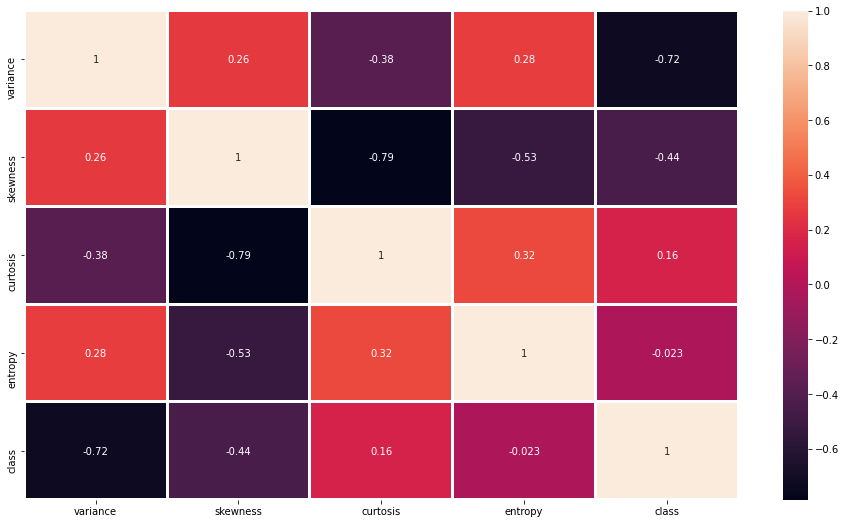

In [9]:
plt.figure(figsize = (16, 9))

sns.heatmap(df.corr(), annot = True, linewidths = 2, )
plt.show()

**Univariate Data Analysis**

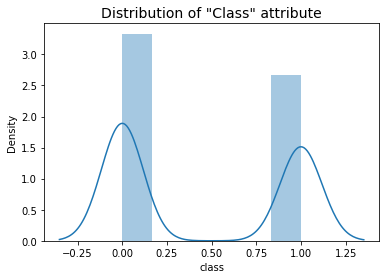

In [10]:
sns.distplot(df['class'])

plt.title('Distribution of "Class" attribute', fontsize = 14)
plt.show()

**Multi-variate Data Analysis**

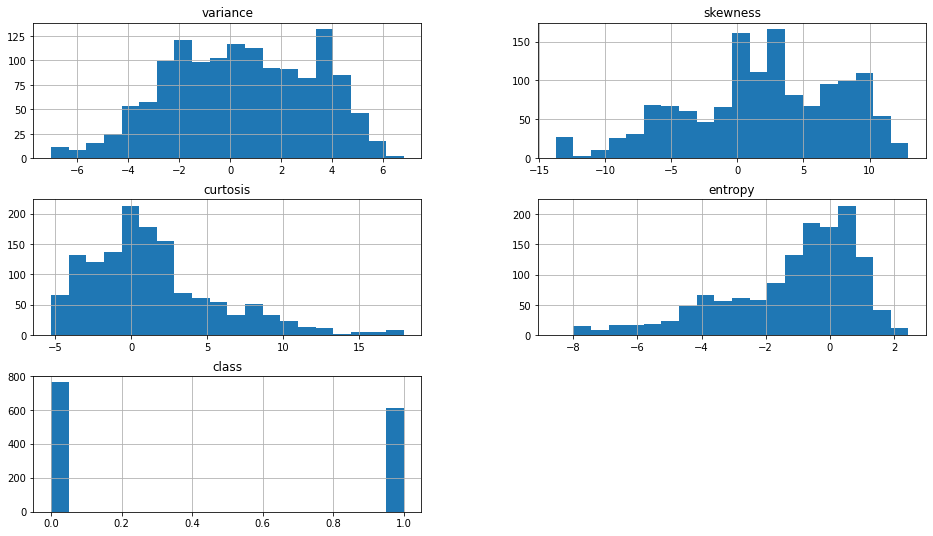

In [11]:
df.hist(bins = 20, layout = (3,2), figsize = (16, 9), )
plt.show()

**PairPlot with hue = 'class'**

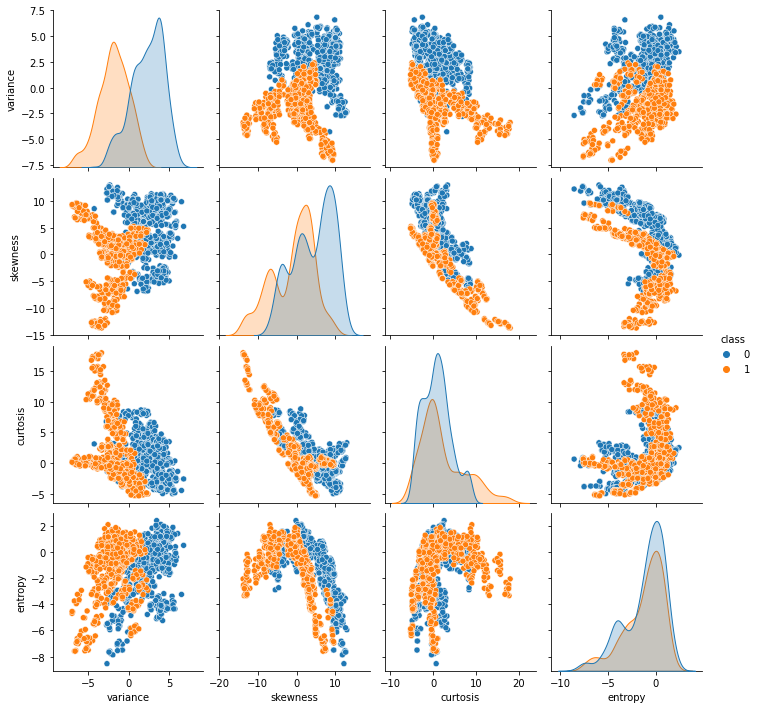

In [12]:
sns.pairplot(df, hue = 'class')

plt.show()

##**Model Building**

#####**Data Preparation**

In [13]:
X_data = df.drop(columns = 'class', axis = 1)
y_data = df['class']

from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(X_data, y_data, random_state = 1, test_size = 0.3)

In [14]:
print(X_train.shape, '\n')
X_train.head()

(960, 4) 



,variance,skewness,curtosis,entropy
694,0.74054,0.36625,2.199200,0.484030
880,-2.35180,-4.83590,6.647900,-0.060358
1251,-0.77688,0.13036,-0.031137,-0.353890
812,-2.06590,1.05120,-0.462980,-1.097400
1212,-2.45600,-0.24418,1.404100,-0.458630


#####**Feature Scaling**

In [15]:
from sklearn.preprocessing import StandardScaler

scaler = StandardScaler() #Will also convert pandas dataframe to numpy array

X_train = scaler.fit_transform(X_train) 
X_test = scaler.fit_transform(X_test)

acc_score = {} #Dictionary to store accuracu score of different algorithms

**Importing some common libraries**

In [16]:
from sklearn.model_selection import cross_val_score
from sklearn.metrics import accuracy_score

#####**Model - 1: Logistic Regression**

In [17]:
from sklearn.linear_model import LogisticRegression

LR_classifier = LogisticRegression(solver = 'liblinear', random_state = 1) #liblinear is a good choice for small dataset
LR_classifier.fit(X_train, y_train)

accuracies = cross_val_score(estimator = LR_classifier, X = X_train, y = y_train, cv = 10)
print('Accuracies:\n', accuracies, '\n')
print('Mean of Accuracies = ', accuracies.mean())

LR_y_pred = LR_classifier.predict(X_test) #Predicting on the data

ac = accuracy_score(y_test, LR_y_pred)

acc_score['Logistic Regression'] = ac #Appending into the dictionary
print('\nAccuracy = ',ac)

Accuracies:
 [0.97916667 0.98958333 0.98958333 0.98958333 0.97916667 0.95833333
 1.         0.97916667 0.97916667 0.97916667] 

Mean of Accuracies =  0.9822916666666666

Accuracy =  0.9757281553398058


**Confusion Matrix for Logistic Regression**

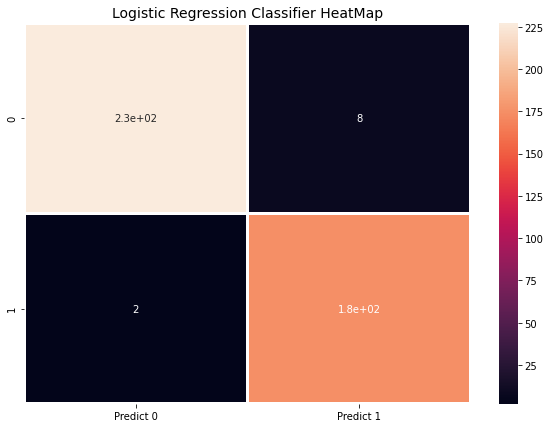

In [18]:
from sklearn import metrics

cm = metrics.confusion_matrix(y_test, LR_y_pred, labels = [0,1])

df_cm = pd.DataFrame(cm, index = [i for i in [0,1]], columns = [i for i in ["Predict 0","Predict 1"]])

plt.figure(figsize = (10,7))
sns.heatmap(df_cm, annot = True, linewidths = 2)

plt.title('Logistic Regression Classifier HeatMap', fontsize = 14)
plt.show()

#####**Model - 2: Support Vector Machine**

In [19]:
from sklearn.svm import SVC

SVM_classifier = SVC()
SVM_classifier.fit(X_train, y_train)

accuracies = cross_val_score(estimator = SVM_classifier, X = X_train, y = y_train, cv = 10)
print('Accuracies:\n', accuracies, '\n')
print('Mean of Accuracies = ', accuracies.mean())

SVM_y_pred = SVM_classifier.predict(X_test)

ac = accuracy_score(y_test, SVM_y_pred)

acc_score['SVM']  = ac
print('\nAccuracy = ',ac)

Accuracies:
 [1. 1. 1. 1. 1. 1. 1. 1. 1. 1.] 

Mean of Accuracies =  1.0

Accuracy =  0.9951456310679612


**Confusion Matrix for SVM**

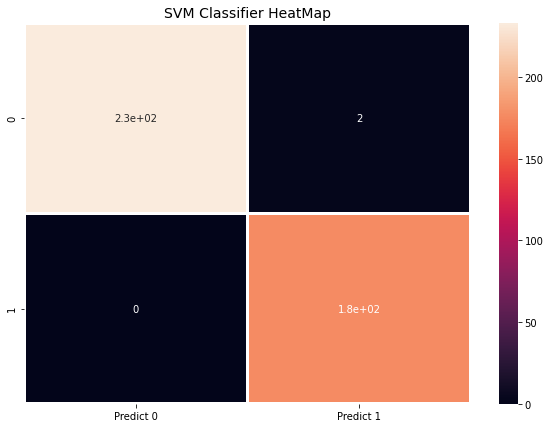

In [20]:
from sklearn import metrics

cm = metrics.confusion_matrix(y_test, SVM_y_pred, labels = [0,1])

df_cm = pd.DataFrame(cm, index = [i for i in [0,1]], columns = [i for i in ["Predict 0","Predict 1"]])

plt.figure(figsize = (10,7))
sns.heatmap(df_cm, annot = True, linewidths = 2)

plt.title('SVM Classifier HeatMap', fontsize = 14)
plt.show()

#####**Model - 2.1: Support Vector Machine**
Kernels in SVM classification refer to the function that is responsible for defining the decision boundaries between the classes.<br><br>
Apart from the classic linear kernel which assumes that the different classes are separated by a straight line, a RBF (radial basis function) kernel is used when the boundaries are hypothesized to be curve-shaped.<br><br>
RBF kernel uses two main parameters, gamma and C that are related to:
<br>1 - the decision region (how spread the region is), and
<br>2 - the penalty for misclassifying a data point<br>
respectively

In [21]:
from sklearn.svm import SVC

SVM_rbf_classifier = SVC(kernel= 'rbf')
SVM_rbf_classifier.fit(X_train, y_train)

accuracies = cross_val_score(estimator = SVM_rbf_classifier, X = X_train, y = y_train, cv = 10)
print('Accuracies:\n', accuracies, '\n')
print('Mean of Accuracies = ', accuracies.mean())

SVM_rbf_y_pred = SVM_rbf_classifier.predict(X_test)

ac = accuracy_score(y_test, SVM_rbf_y_pred)

acc_score['SVM_rbf'] = ac
print('\nAccuracy = ',ac)

Accuracies:
 [1. 1. 1. 1. 1. 1. 1. 1. 1. 1.] 

Mean of Accuracies =  1.0

Accuracy =  0.9951456310679612


**Confusion Matrix for SVM (rbf)**

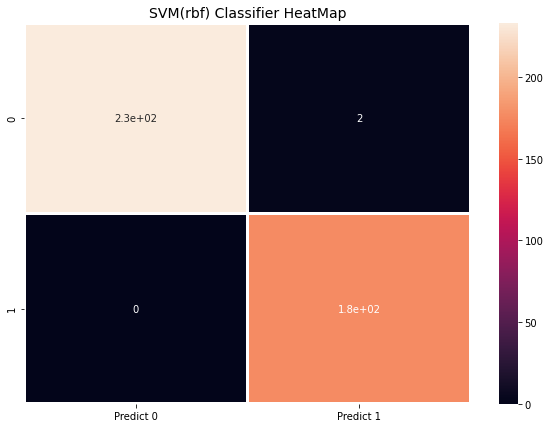

In [22]:
from sklearn import metrics

cm = metrics.confusion_matrix(y_test, SVM_rbf_y_pred, labels = [0,1])

df_cm = pd.DataFrame(cm, index = [i for i in [0,1]], columns = [i for i in ["Predict 0","Predict 1"]])

plt.figure(figsize = (10,7))
sns.heatmap(df_cm, annot = True, linewidths = 2)

plt.title('SVM(rbf) Classifier HeatMap', fontsize = 14)
plt.show()

#####**Model - 3: Random Forest Classifier**

In [23]:
from sklearn.ensemble import RandomForestClassifier

RF_classifier = RandomForestClassifier(n_estimators=50, criterion='entropy', random_state=0)
RF_classifier.fit(X_train, y_train)

accuracies = cross_val_score(estimator = RF_classifier, X = X_train, y = y_train, cv = 10)
print('Accuracies:\n', accuracies, '\n')
print('Mean of Accuracies = ', accuracies.mean())

RF_y_pred = RF_classifier.predict(X_test)

ac = accuracy_score(y_test, RF_y_pred)

acc_score['Random Forest'] = ac
print('\nAccuracy = ', ac)

Accuracies:
 [0.98958333 0.96875    0.98958333 0.98958333 0.98958333 0.98958333
 1.         1.         1.         1.        ] 

Mean of Accuracies =  0.9916666666666668

Accuracy =  0.9927184466019418


**Confusion Matrix for Random Forest Classifier**

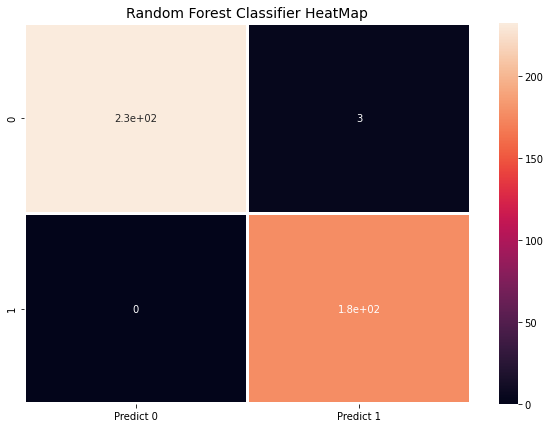

In [24]:
from sklearn import metrics

cm = metrics.confusion_matrix(y_test, RF_y_pred, labels = [0,1])

df_cm = pd.DataFrame(cm, index = [i for i in [0,1]], columns = [i for i in ["Predict 0","Predict 1"]])

plt.figure(figsize = (10,7))
sns.heatmap(df_cm, annot = True, linewidths = 2)

plt.title('Random Forest Classifier HeatMap', fontsize = 14)
plt.show()

#####**Model - 4: KNN Classifier**

In [25]:
from sklearn.neighbors import KNeighborsClassifier
from sklearn.model_selection import KFold, GridSearchCV

param_grid = {'leaf_size': [2, 5, 7, 9, 11],
              'n_neighbors': [2, 5, 7, 9, 11],
              'p': [1, 2]}
grid = GridSearchCV(KNeighborsClassifier(), param_grid = param_grid)
grid.fit(X_train, y_train)

GridSearchCV(cv=None, error_score=nan,
             estimator=KNeighborsClassifier(algorithm='auto', leaf_size=30,
                                            metric='minkowski',
                                            metric_params=None, n_jobs=None,
                                            n_neighbors=5, p=2,
                                            weights='uniform'),
             iid='deprecated', n_jobs=None,
             param_grid={'leaf_size': [2, 5, 7, 9, 11],
                         'n_neighbors': [2, 5, 7, 9, 11], 'p': [1, 2]},
             pre_dispatch='2*n_jobs', refit=True, return_train_score=False,
             scoring=None, verbose=0)

In [26]:
grid.best_params_

{'leaf_size': 2, 'n_neighbors': 2, 'p': 2}

In [27]:
final_KNN_Model = grid.best_estimator_

In [28]:
KNN = KNeighborsClassifier(n_neighbors=2, p=2, leaf_size=2)

In [29]:
KNN.fit(X_train, y_train)

KNN_y_pred = KNN.predict(X_test)

ac = accuracy_score(y_test,KNN_y_pred)

acc_score['KNN'] = ac
print(ac)

0.9975728155339806


**Confusion Matrix for KNN Classifier**

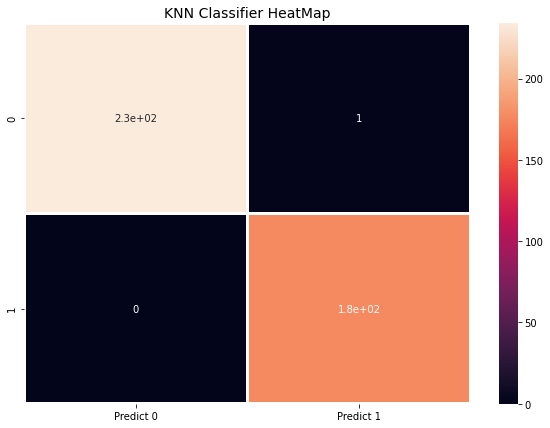

In [30]:
from sklearn import metrics

cm = metrics.confusion_matrix(y_test, KNN_y_pred, labels = [0,1])

df_cm = pd.DataFrame(cm, index = [i for i in [0,1]], columns = [i for i in ["Predict 0","Predict 1"]])

plt.figure(figsize = (10,7))
sns.heatmap(df_cm, annot = True, linewidths = 2)

plt.title('KNN Classifier HeatMap', fontsize = 14)
plt.show()

#####**Model - 5: Multilayer Perceptron**

In [31]:
from sklearn.neural_network import MLPClassifier

multi_classifier = MLPClassifier(hidden_layer_sizes = (8,4), max_iter = 8000, alpha = 0.0001, solver='sgd', verbose=10,
                                 random_state=21, tol=0.000000001)

multi_classifier.fit(X_train,y_train)

accuracies = cross_val_score(estimator = multi_classifier, X = X_test, y = y_test, cv = 10)
print(accuracies)

Streaming output truncated to the last 5000 lines.
Iteration 3002, loss = 0.01091593
Iteration 3003, loss = 0.01091089
Iteration 3004, loss = 0.01090708
Iteration 3005, loss = 0.01090122
Iteration 3006, loss = 0.01089679
Iteration 3007, loss = 0.01089287
Iteration 3008, loss = 0.01088686
Iteration 3009, loss = 0.01088252
Iteration 3010, loss = 0.01087735
Iteration 3011, loss = 0.01087347
Iteration 3012, loss = 0.01086859
Iteration 3013, loss = 0.01086375
Iteration 3014, loss = 0.01085897
Iteration 3015, loss = 0.01085451
Iteration 3016, loss = 0.01084941
Iteration 3017, loss = 0.01084576
Iteration 3018, loss = 0.01084059
Iteration 3019, loss = 0.01083604
Iteration 3020, loss = 0.01083217
Iteration 3021, loss = 0.01082629
Iteration 3022, loss = 0.01082142
Iteration 3023, loss = 0.01081713
Iteration 3024, loss = 0.01081209
Iteration 3025, loss = 0.01080828
Iteration 3026, loss = 0.01080285
Iteration 3027, loss = 0.01079871
Iteration 3028, loss = 0.01079403
Iteration 3029, loss = 0.010789

In [32]:
print('Mean of Accuracies = ', accuracies.mean())

multi_y_pred = multi_classifier.predict(X_test)

ac = accuracy_score(y_test,multi_y_pred)

acc_score['MLP'] = ac
print(ac)

Mean of Accuracies =  1.0
1.0


**Confusion Matrix for MLP Classifier**

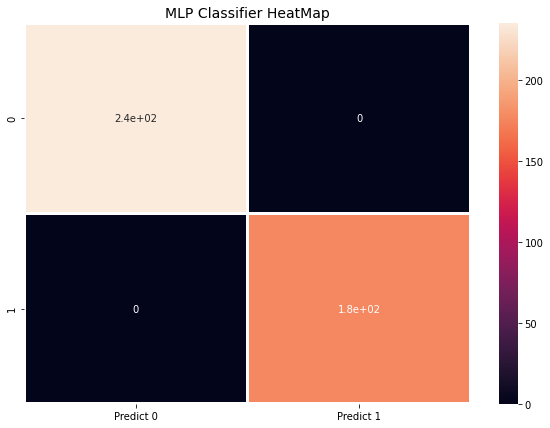

In [33]:
from sklearn import metrics

cm = metrics.confusion_matrix(y_test, multi_y_pred, labels = [0,1])

df_cm = pd.DataFrame(cm, index = [i for i in [0,1]], columns = [i for i in ["Predict 0","Predict 1"]])

plt.figure(figsize = (10,7))
sns.heatmap(df_cm, annot = True, linewidths = 2)

plt.title('MLP Classifier HeatMap', fontsize = 14)
plt.show()

#####**Accuracy score of Algorithms**

In [34]:
print('Accuracy Score for different Algorithms:\n')
for key, value in acc_score.items():
  print(key, ' = ', value*100, '\n')

Accuracy Score for different Algorithms:

Logistic Regression  =  97.57281553398059 

SVM  =  99.51456310679612 

SVM_rbf  =  99.51456310679612 

Random Forest  =  99.27184466019418 

KNN  =  99.75728155339806 

MLP  =  100.0 

